In [1]:
from utils import *

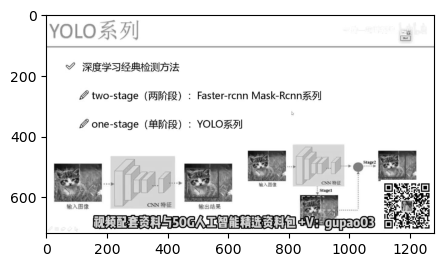

In [2]:
img = readImage('./input/test.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

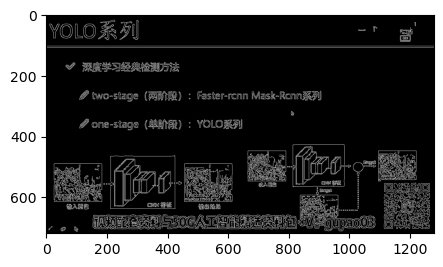

In [3]:
edges = cv.Canny(img_gray, 50, 150, apertureSize=3)
showImage(edges, cmap='gray')

In [4]:
help(cv.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .   
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .   
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .   
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .   
    .   for the x-derivative, or transposed for the y-derivative.
    . 

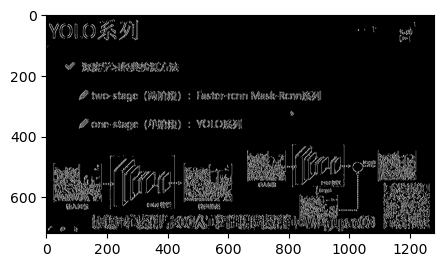

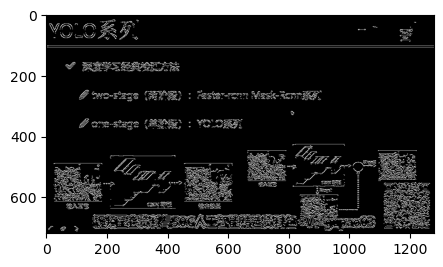

In [5]:
dest_x = cv.Sobel(edges, cv.CV_8UC1, 1, 0, 3)
dest_y = cv.Sobel(edges, cv.CV_8UC1, 0, 1, 3)
showImage(dest_x, cmap='gray')
showImage(dest_y, cmap='gray')

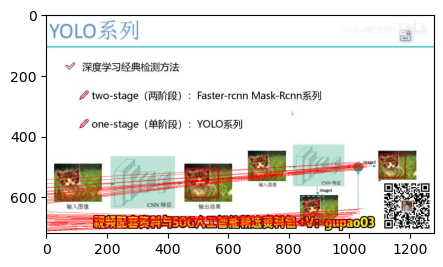

In [15]:
lines_x = cv.HoughLines(dest_x,1,np.pi/180,250)
img_tmp = img.copy()
for line in lines_x:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_tmp,(x1,y1),(x2,y2),(255,0,0),1)
showImage(img_tmp)

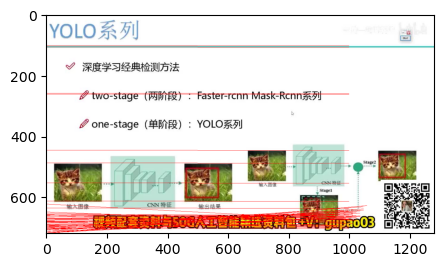

In [16]:
lines_y = cv.HoughLines(dest_y,1,np.pi/180,250)
img_tmp = img.copy()
for line in lines_y:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_tmp,(x1,y1),(x2,y2),(255,0,0),1)
showImage(img_tmp)

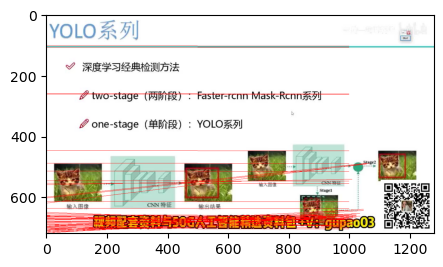

In [17]:
lines = cv.HoughLines(edges,1,np.pi/180,250)
img_tmp = img.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_tmp,(x1,y1),(x2,y2),(255,0,0),1)
showImage(img_tmp)

In [22]:
lines.shape

(122, 1, 4)

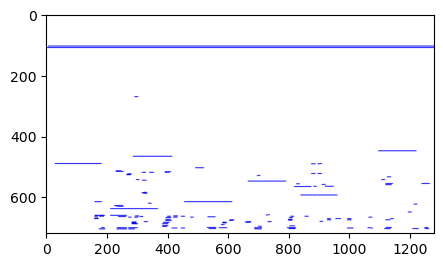

In [31]:
lines = cv.HoughLinesP(edges,1,np.pi/180,200, 100, 10)
img_tmp = np.ones(img.shape, np.uint8)*255
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img_tmp, (x1, y1), (x2, y2), (0, 0, 255), 2)
showImage(img_tmp)

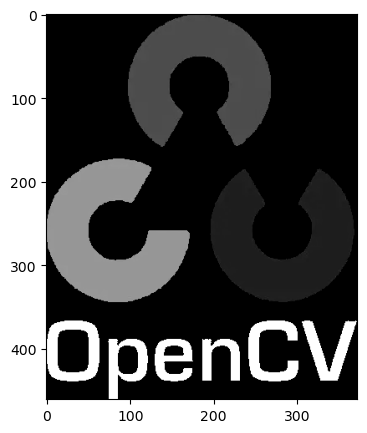

In [32]:
img = readImage('./input/opencv.png')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

In [76]:
dest = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=0)
dest.shape

(1, 8, 3)

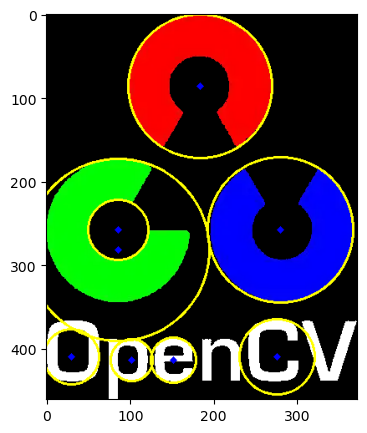

In [77]:
circles = np.uint16(np.around(dest))
img_tmp = img.copy()
for x, y, r in circles[0]:
    cv.circle(img_tmp, (x, y), r, (255, 255, 0), 2)
    cv.circle(img_tmp, (x, y), 2, (0, 0, 255), 3)
showImage(img_tmp)